## Karakas 2016 net yields from MCMC

Run the multi_star_optimization script to calculate the posterior parameter set with Karakas 16 yield (via MCMC), using the new model error beta function marginalization. Change yield set using a.yield_table_agb_model_index = 4

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
from Chempy.wrapper import multi_star_optimization # (there will be many gas reservoir/upper border errors but these can be ignored)
%timeit -n 1 -r 1 multi_star_optimization()

# This was done on a different PC but results are shown below

1.3323621127 -1.44283550562
posterior -1, -100, -200 -1.44283550562 -1.55820249652 -1.11539525111
posterior 0, 100, 200 1.3323621127 -0.832133524856 -1.09197581051
calculation so far took 13211.720793485641  seconds
1 loop, best of 3: 3h 41min 24s per loop


This takes a time of 3 hours, 41 mins, 24s to run. Data is in the mcmc/ folder - copy this into the karakas16 folder to save. Output is shown above.

In [2]:
## Now restructure the chain

from Chempy.plot_mcmc import restructure_chain
restructure_chain('karakas16/')

blob shape =  (64, 303, 22, 1) probably some runs did not return results and were stored anyway.
The chain has a length of 303 iterations, each iteration having 64 evaluations/walkers
Mean posteriors at the beginning and the end of the chain:
-1.44283550562 1.3323621127
Mean posteriors after the burn-in tail is cut out:
-1.44283550562 -0.929584700628
We are left with a sample of 4992 posterior evaluations from the converged MCMC chain
We have 4992 iterations good enough posterior, their posteriors range from
1.59748844972 -9.98042403768
Highest posterior was obtained at parameters:  [[-2.61473929 -2.86116921 -0.9396332  -0.30867458  0.53589988  0.4809357 ]]
Number of unique posterior values:  2613
Inferred marginalized parameter distributions are:
0 -2.58230088528 +- 0.119036954131
1 -2.79897442136 +- 0.139214408944
2 -0.793622911259 +- 0.291140237306
3 -0.30974660471 +- 0.267407656207
4 0.537972326844 +- 0.103968335915
5 0.493027963832 +- 0.0962708677956


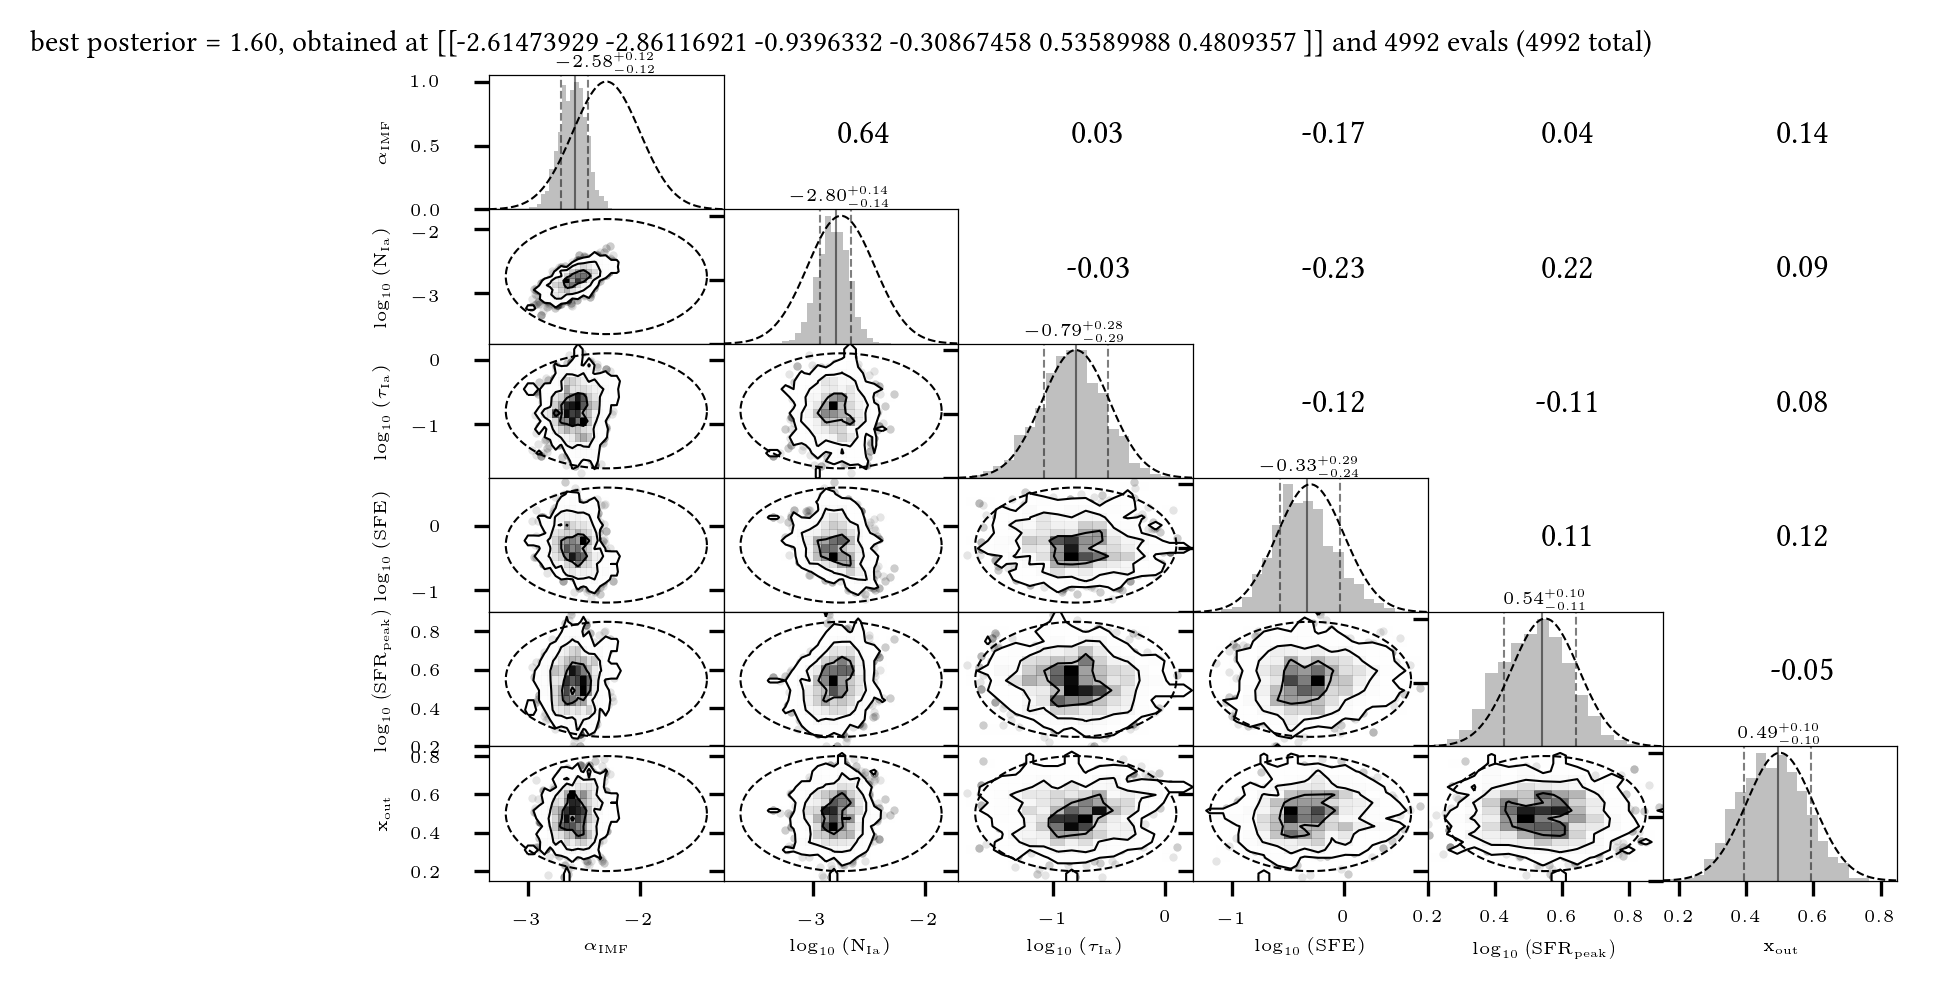

In [3]:
## Plot the posterior and prior values and correlation grid
from Chempy.plot_mcmc import plot_mcmc_chain_with_prior
plot_mcmc_chain_with_prior('karakas16/',use_prior = True, only_first_star = False,plot_true_parameters = False,plot_only_SSP_parameter = False)

### Before running the below, change the yield_table_name_agb_index to 4 in the parameter.py file

In [4]:
# Create output for best-fit parameters
from Chempy.cem_function import cem2, extract_parameters_and_priors
from Chempy.parameter import ModelParameters
a=ModelParameters()
a.p0 = np.array([-2.58,-2.80,-0.79,-0.33,0.54,0.49]) # Parameters found by model

a = extract_parameters_and_priors(a.p0, a) # To update to new model

abundances, names = cem2(a) # predict abundances

/home/philcox/anaconda3/lib/python3.6/site-packages/numpy/core/records.py:507: FutureWarning: Numpy has detected that you may be viewing or writing to an array returned by selecting multiple fields in a structured array. 

This code may break in numpy 1.13 because this will return a view instead of a copy -- see release notes for details.
  return obj.view(dtype=(self.dtype.type, obj.dtype))
/home/philcox/Chempy/Chempy/wrapper.py:160: RuntimeWarning: invalid value encountered in subtract
  abundances[element] -= abundances['Fe']


In [5]:
# Load in proto-sun abundances and errors (remove last value (solar age))
proto_sun = np.load('Chempy/input/stars/Proto-sun.npy')
proto_sun_abundance = []
proto_sun_error = []
model_abundance = []
#names = np.asarray(names) # For compatibility

# Calculate model abundance in same order as proto-sun
for i,item in enumerate(proto_sun.dtype.names[:-1]):
    for j,jtem in enumerate(names):
        if jtem == item:
            model_abundance.append(abundances[j])
    #model_abundance.append(abundances[np.where(names==item)])
    proto_sun_abundance.append(proto_sun[0][i])
    proto_sun_error.append(proto_sun[1][i])
    
# Load abundance names ([X/Fe]) in correct order
abundance_names = []
for item in proto_sun.dtype.names[:-1]:
    if item != 'Fe':
        abundance_names.append('[%s/Fe]' %(item))
    else:
        abundance_names.append('[Fe/H]')

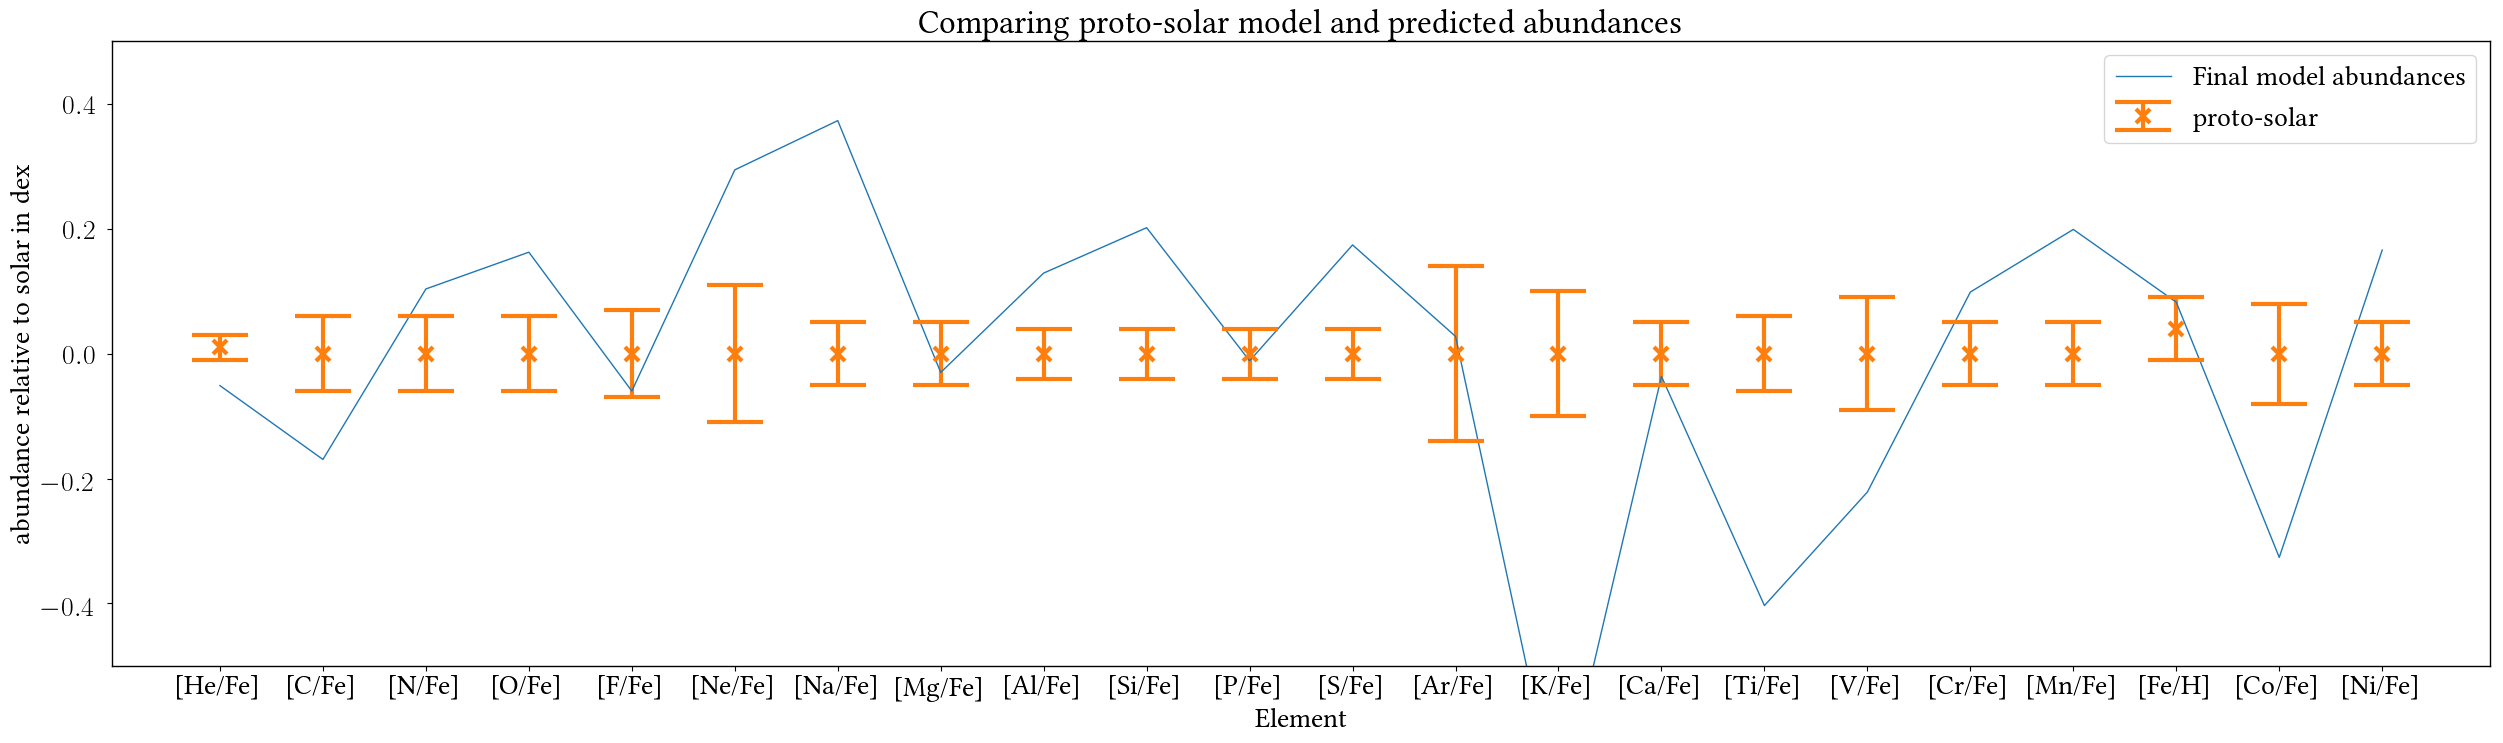

In [6]:
# Plot figure comparing model and observational abundancess
fig = plt.figure(figsize=(30.69,8.27), dpi=100)
plt.clf()
text_size = 20
plt.rc('font', family='serif',size = text_size)
plt.rc('xtick', labelsize=text_size)
plt.rc('ytick', labelsize=text_size)
plt.rc('axes', labelsize=text_size, lw=1.)
plt.rc('lines', linewidth = 1.)
plt.rcParams['ytick.major.pad']='8'
plt.rcParams['text.latex.preamble']=[r"\usepackage{libertine}"]
params = {'text.usetex' : True,'font.size' : 16,'font.family' : 'libertine','text.latex.unicode': True}
ax = fig.add_subplot(111)
plt.plot(np.arange(len(abundance_names)),model_abundance,label='Final model abundances',linestyle='-') # Plot model data
plt.errorbar(np.arange(len(abundance_names)),proto_sun_abundance,xerr=None,yerr=proto_sun_error,linestyle = '',mew=3,marker='x',capthick =3,capsize = 20, ms = 10,elinewidth=3,label='proto-solar')
plt.ylim((-0.5,0.5))
plt.xticks(np.arange(len(a.element_names)),abundance_names)
plt.ylabel("abundance relative to solar in dex")
plt.xlabel("Element")
plt.title("Comparing proto-solar model and predicted abundances")
plt.legend()
savefig('karakas16/AbundancePlot')

## Rerun without error optimization
Set model errors to zero to test with no error marginalization, and stored in karakas16_zero_error

#### Change these settings in the parameter.py file, since multi_star_optimization resets parameters to defaults.

a.error_marginalization = False
a.zero_model_error = True

In [ ]:
from Chempy.wrapper import multi_star_optimization # Run code without error optimization
# errors in abundance['Fe'] are fine, since initial Fe mass is zero, so abundance is -inf
%timeit -n 1 -r 1 multi_star_optimization() # Time running - use -n, -r to set only 1 iteration of code
# (Run on a faster PC)

**Output from multi_star_optimization is shown below** - time is 3 hours, 43 minutes and 17 seconds

-84.717855377 -86.904634004
posterior -1, -100, -200 -86.904634004 -86.5607118141 -87.3521669838
posterior 0, 100, 200 -84.717855377 -87.1290343271 -86.7278537678
calculation so far took 12815.132485866547  seconds
1 loop, best of 1: 3h 43min 17s per loop

   

In [8]:
## Now restructure the chain

from Chempy.plot_mcmc import restructure_chain
restructure_chain('karakas16_zero_error/')

blob shape =  (64, 304, 22, 1) probably some runs did not return results and were stored anyway.
The chain has a length of 304 iterations, each iteration having 64 evaluations/walkers
Mean posteriors at the beginning and the end of the chain:
-86.904634004 -84.717855377
Mean posteriors after the burn-in tail is cut out:
-86.904634004 -87.0664513234
We are left with a sample of 4992 posterior evaluations from the converged MCMC chain
We have 4992 iterations good enough posterior, their posteriors range from
-84.0066136329 -96.0520346028
Highest posterior was obtained at parameters:  [[-2.75392264 -2.94876447 -0.88027561 -0.26787236  0.45889782  0.45033103]]
Number of unique posterior values:  2516
Inferred marginalized parameter distributions are:
0 -2.75151944322 +- 0.0407399563575
1 -2.94625719386 +- 0.0717428667636
2 -0.833555227312 +- 0.298573000538
3 -0.217703121227 +- 0.156689833747
4 0.491507670619 +- 0.0761882940896
5 0.40978323986 +- 0.0876598078403


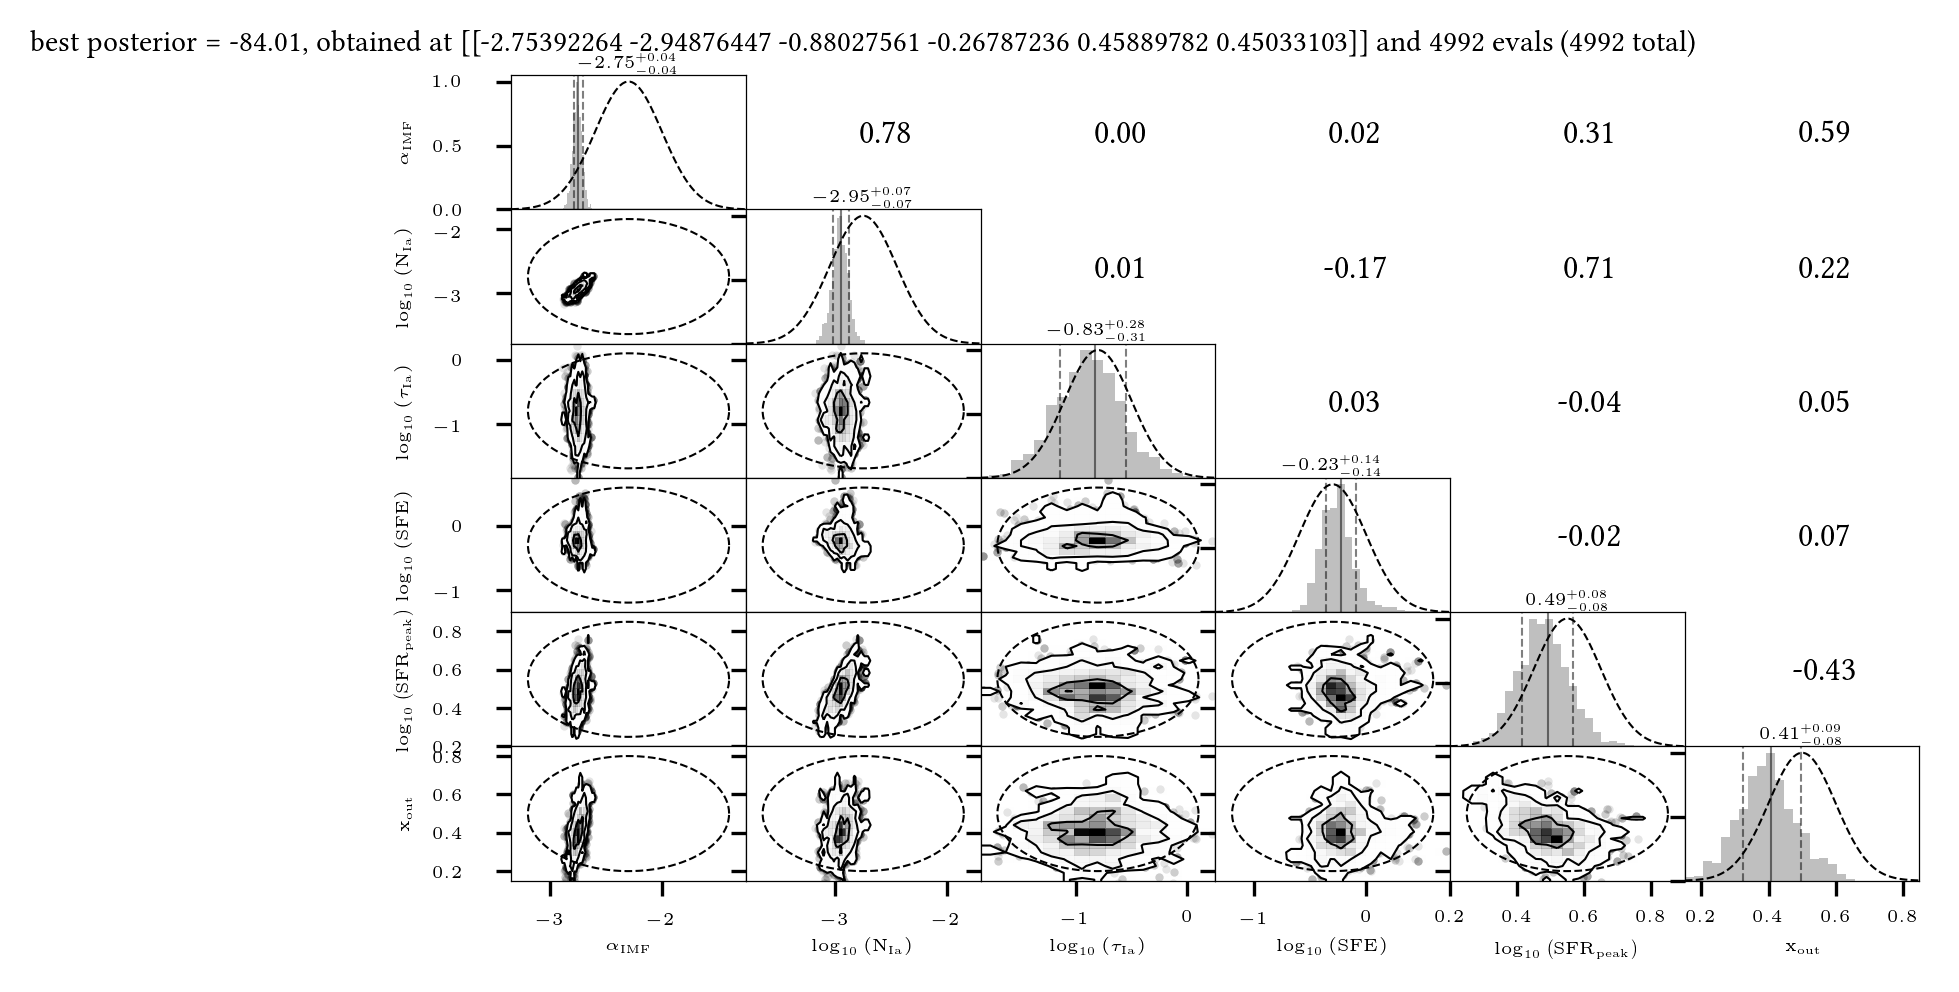

In [9]:
## Plot the posterior and prior values and correlation grid
from Chempy.plot_mcmc import plot_mcmc_chain_with_prior
plot_mcmc_chain_with_prior('karakas16_zero_error/',use_prior = True, only_first_star = False,plot_true_parameters = False,plot_only_SSP_parameter = False)

In [11]:
# Create output for best-fit parameters
from Chempy.cem_function import cem2, extract_parameters_and_priors
from Chempy.parameter import ModelParameters
a=ModelParameters()

a.p0 = np.array([-2.75,-2.95,-0.83,-0.23,0.49,0.41]) # Parameters found by model

a = extract_parameters_and_priors(a.p0, a) # To update to new model
abundances, names = cem2(a) # predict abundances

/home/philcox/anaconda3/lib/python3.6/site-packages/numpy/core/records.py:507: FutureWarning: Numpy has detected that you may be viewing or writing to an array returned by selecting multiple fields in a structured array. 

This code may break in numpy 1.13 because this will return a view instead of a copy -- see release notes for details.
  return obj.view(dtype=(self.dtype.type, obj.dtype))
/home/philcox/Chempy/Chempy/wrapper.py:160: RuntimeWarning: invalid value encountered in subtract
  abundances[element] -= abundances['Fe']


### ADD params above

In [12]:
# Load in proto-sun abundances and errors (remove last value (solar age))
proto_sun = np.load('Chempy/input/stars/Proto-sun.npy')
proto_sun_abundance = []
proto_sun_error = []
model_abundance = []

# Calculate model abundance in same order as proto-sun
for i,item in enumerate(proto_sun.dtype.names[:-1]):
    for j,jtem in enumerate(names):
        if jtem == item:
            model_abundance.append(abundances[j])
    #model_abundance.append(abundances[np.where(names==item)])
    proto_sun_abundance.append(proto_sun[0][i])
    proto_sun_error.append(proto_sun[1][i])
    
# Load abundance names ([X/Fe]) in correct order
abundance_names = []
for item in proto_sun.dtype.names[:-1]:
    if item != 'Fe':
        abundance_names.append('[%s/Fe]' %(item))
    else:
        abundance_names.append('[Fe/H]')

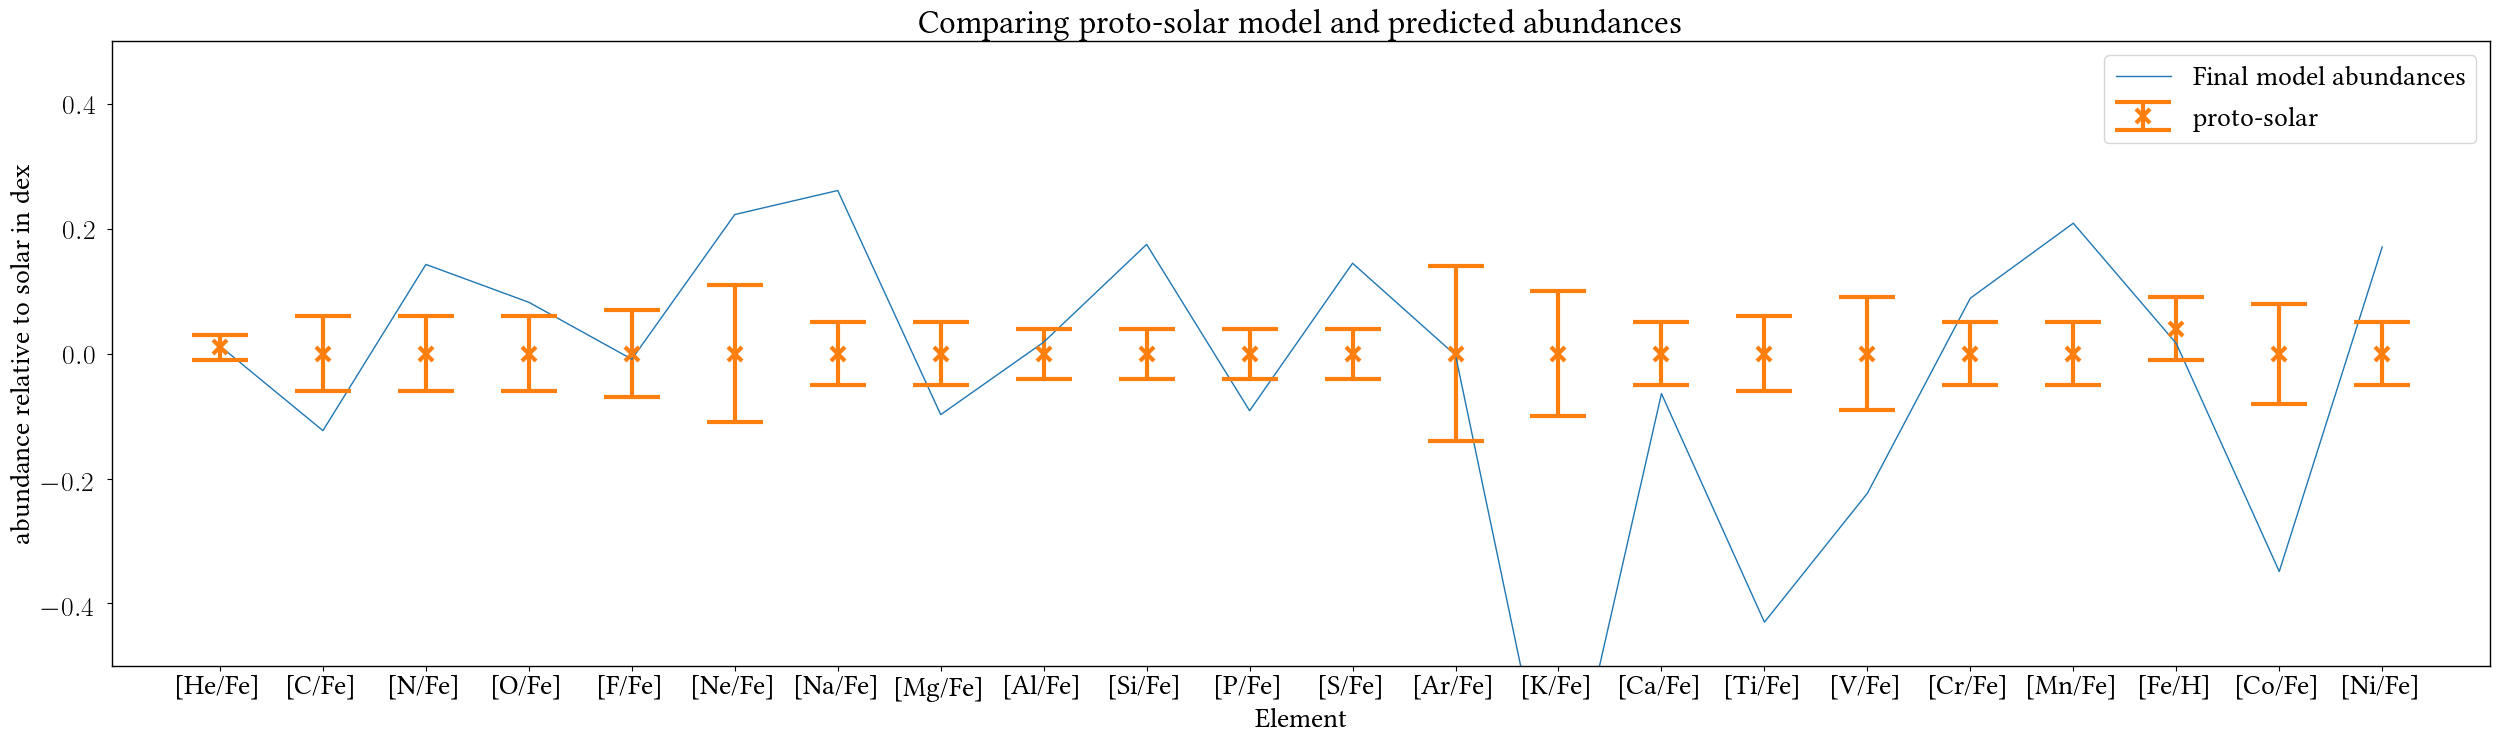

In [13]:
# Plot figure
fig = plt.figure(figsize=(30.69,8.27), dpi=100)
plt.clf()
text_size = 20
plt.rc('font', family='serif',size = text_size)
plt.rc('xtick', labelsize=text_size)
plt.rc('ytick', labelsize=text_size)
plt.rc('axes', labelsize=text_size, lw=1.)
plt.rc('lines', linewidth = 1.)
plt.rcParams['ytick.major.pad']='8'
plt.rcParams['text.latex.preamble']=[r"\usepackage{libertine}"]
params = {'text.usetex' : True,'font.size' : 16,'font.family' : 'libertine','text.latex.unicode': True}
ax = fig.add_subplot(111)
plt.plot(np.arange(len(abundance_names)),model_abundance,label='Final model abundances',linestyle='-') # Plot model data
plt.errorbar(np.arange(len(abundance_names)),proto_sun_abundance,xerr=None,yerr=proto_sun_error,linestyle = '',mew=3,marker='x',capthick =3,capsize = 20, ms = 10,elinewidth=3,label='proto-solar')
plt.ylim((-0.5,0.5))
plt.xticks(np.arange(len(a.element_names)),abundance_names)
plt.ylabel("abundance relative to solar in dex")
plt.xlabel("Element")
plt.title("Comparing proto-solar model and predicted abundances")
plt.legend()
savefig('karakas16_zero_error/AbundancePlot')